# Imports

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Read image

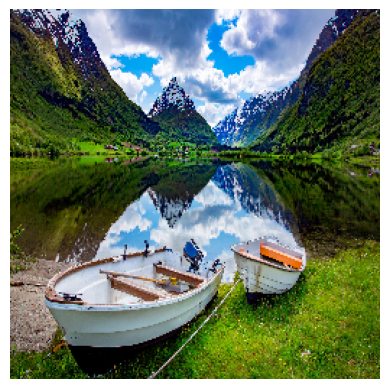

In [3]:
sample_image = cv2.imread('image.jpg')
image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (256, 256))

plt.axis('off')
plt.imshow(image)

# Image preprocessing

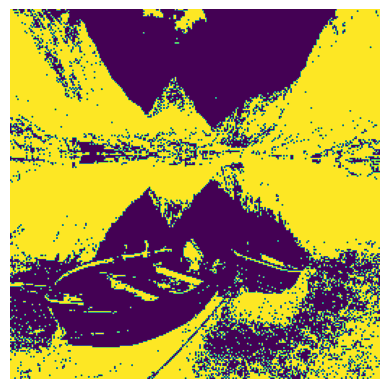

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)

plt.axis('off')
plt.imshow(thresh)

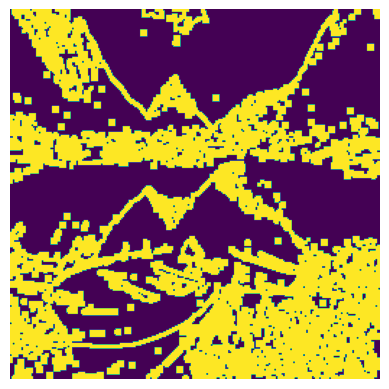

In [6]:
edges = cv2.dilate(cv2.Canny(thresh, 0, 255), None)

plt.axis('off')
plt.imshow(edges)

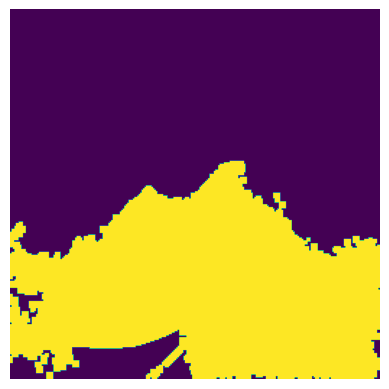

In [7]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((256, 256), np.uint8)
masked = cv2.drawContours(mask, [cnt], -1, 255, -1)

plt.axis('off')
plt.imshow(masked)

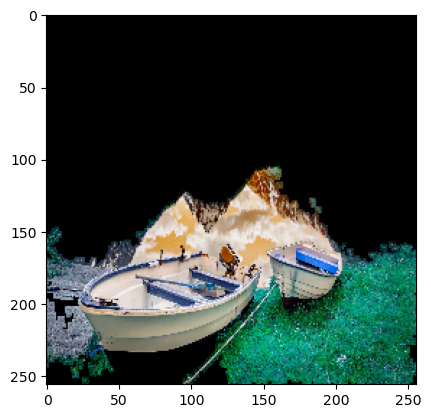

In [10]:
dst = cv2.bitwise_and(image, image, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(segmented)